In [6]:
library(tidyr)
library(dplyr)
library(limma)
library(clusterProfiler)
library(org.Hs.eg.db)

In [2]:
setwd("/ai/data/wuqiao/clinical_sample/WES/RAW_VCF/MT_analysis_2025.5.14_adjust_annotation/paired code and results_adjusted/data/protein")

In [3]:
protein=read.delim("20240624_145736_2024-WZ-WQ-310samples-proteome_Report_proteins.tsv", header = TRUE, sep = "\t")

In [4]:
head(protein)

,PG.ProteinGroups,PG.ProteinAccessions,PG.ProteinDescriptions,PG.UniProtIds,PG.Qvalue,X.1..HT00033_XM_WZ_WQ_DIA_1_Slot2.07_1_432.d.PG.Quantity,X.2..HT00034_XM_WZ_WQ_DIA_2_Slot2.08_1_433.d.PG.Quantity,X.3..HT00035_XM_WZ_WQ_DIA_3_Slot2.09_1_434.d.PG.Quantity,X.4..HT00036_XM_WZ_WQ_DIA_4_Slot2.10_1_435.d.PG.Quantity,X.5..HT00037_XM_WZ_WQ_DIA_5_Slot2.11_1_436.d.PG.Quantity,⋯,X.301..HT00816_XM_WZ_WQ_DIA_207_Slot2.73_1_1799.d.EG.ApexRT,X.302..HT00817_XM_WZ_WQ_DIA_209_Slot2.74_1_1800.d.EG.ApexRT,X.303..HT00818_XM_WZ_WQ_DIA_215_Slot2.75_1_1801.d.EG.ApexRT,X.304..HT00819_XM_WZ_WQ_DIA_218_Slot2.76_1_1802.d.EG.ApexRT,X.305..HT00820_XM_WZ_WQ_DIA_233_Slot2.77_1_1803.d.EG.ApexRT,X.306..HT00821_XM_WZ_WQ_DIA_237_Slot2.78_1_1804.d.EG.ApexRT,X.307..HT00822_XM_WZ_WQ_DIA_249_Slot2.79_1_1805.d.EG.ApexRT,X.308..HT00823_XM_WZ_WQ_DIA_268_Slot2.80_1_1806.d.EG.ApexRT,X.309..HT00824_XM_WZ_WQ_DIA_291_Slot2.81_1_1807.d.EG.ApexRT,X.310..HT00825_XM_WZ_WQ_DIA_292_Slot2.82_1_1808.d.EG.ApexRT
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A0A075B6H7,A0A075B6H7,Probable non-functional immunoglobulin kappa variable 3-7,A0A075B6H7,1.440077e-04,34.49028,240.24474,30.47702,24.96445,219.95924,⋯,Filtered,32.75516891479492,34.18693542480469,33.68423080444336,Filtered,Filtered,33.855228424072266,Filtered,34.039039611816406,Filtered
2,A0A075B6H7,A0A075B6H7,Probable non-functional immunoglobulin kappa variable 3-7,A0A075B6H7,1.440077e-04,34.49028,240.24474,30.47702,24.96445,219.95924,⋯,Filtered,Filtered,Filtered,35.55065155029297,Filtered,Filtered,Filtered,Filtered,Filtered,Filtered
3,A0A075B6H9,A0A075B6H9,Immunoglobulin lambda variable 4-69,A0A075B6H9,7.739145e-10,NaN,NaN,NaN,NaN,NaN,⋯,5.618655204772949,5.578795909881592,5.485913276672363,5.501894474029541,Filtered,5.613868236541748,5.6548309326171875,5.663473129272461,Filtered,5.688177108764648
4,A0A075B6I0,A0A075B6I0,Immunoglobulin lambda variable 8-61,A0A075B6I0,9.345303e-06,29.60898,31.51869,NaN,49.46689,17.10786,⋯,Filtered,18.147621154785156,Filtered,17.825008392333984,18.627925872802734,19.242633819580078,19.85770606994629,19.516845703125,Filtered,Filtered
5,A0A075B6I7;A0A087WSX0;A0A0G2JS06,A0A075B6I7;A0A087WSX0;A0A0G2JS06,Probable non-functional immunoglobulin lambda variable 5-48;Immunoglobulin lambda variable 5-45;Immunoglobulin lambda variable 5-39,A0A075B6I7;A0A087WSX0;A0A0G2JS06,2.488003e-07,NaN,NaN,NaN,NaN,NaN,⋯,Filtered,Filtered,Filtered,19.727619171142578,Filtered,Filtered,Filtered,Filtered,Filtered,Filtered
6,A0A075B6J9,A0A075B6J9,Immunoglobulin lambda variable 2-18,A0A075B6J9,8.083657e-14,NaN,142.27534,83.29963,108.35078,NaN,⋯,21.008697509765625,Filtered,20.837387084960938,20.530899047851562,Filtered,21.688007354736328,22.17575454711914,Filtered,Filtered,21.4420223236084


In [10]:
library(dplyr)
protein <- as.data.frame(protein)
selected_columns <- protein %>%
  dplyr::select(PG.ProteinAccessions, contains(".PG.Quantity"))

In [11]:
print(head(selected_columns))

              PG.ProteinAccessions
1                       A0A075B6H7
2                       A0A075B6H7
3                       A0A075B6H9
4                       A0A075B6I0
5 A0A075B6I7;A0A087WSX0;A0A0G2JS06
6                       A0A075B6J9
  X.1..HT00033_XM_WZ_WQ_DIA_1_Slot2.07_1_432.d.PG.Quantity
1                                                 34.49028
2                                                 34.49028
3                                                      NaN
4                                                 29.60898
5                                                      NaN
6                                                      NaN
  X.2..HT00034_XM_WZ_WQ_DIA_2_Slot2.08_1_433.d.PG.Quantity
1                                                240.24474
2                                                240.24474
3                                                      NaN
4                                                 31.51869
5                                              

In [8]:
write.table(selected_columns,"protein_expression.csv",sep=",",quote=F,row.names=F)

In [12]:
# 读取数据
ID=read.table("256sample_mutation_paired_clinical_filter_adjust.csv", header = TRUE, sep = ",", quote="\"")
protein<- unique(read.table("protein_expression.csv", sep = ",", header=T,quote="\"",na.strings = "NaN",check.names = FALSE))
protein_ID=read.table("proteinID_ID.csv", header = TRUE, sep = ",", quote="")

In [13]:
selected_ID=unique(merge(ID[,1],protein_ID,by.x=1,by.y=2))

In [14]:
print(head(selected_ID))

         x Protein.ID    class
1  1276016        189    tumor
6  1286797        262 adjacent
7  1286797        263    tumor
12 1287996        269 adjacent
16 1288251        258    tumor
17 1288251        259 adjacent


In [136]:
write.table(selected_ID,"selected_ID.csv",sep=",",quote=F,row.names=F)

In [52]:
head(protein)

,PG.ProteinAccessions,1,2,3,4,5,6,7,8,9,⋯,207,209,215,218,233,237,249,268,291,292
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A0A075B6H7,34.49027634,240.2447357,30.47702026,24.96445084,219.9592438,22.57979393,40.69401169,NA,27.3516922,⋯,NA,354.5648499,197.4889069,305.900177,NA,NA,177.150116,NA,53.71511459,NA
3,A0A075B6H9,NA,NA,NA,NA,NA,37.53689575,51.58150101,54.10552979,NA,⋯,188.079071,205.2408752,127.8750076,305.5470276,NA,193.3349915,343.2359619,180.3351898,NA,489.5879211
4,A0A075B6I0,29.60898209,31.51869392,NA,49.46688843,17.10786057,74.98523712,57.18087006,22.77923012,NA,⋯,NA,950.7294312,NA,1786.9198,860.7960205,2209.059814,266.9151917,1052.986694,NA,NA
5,A0A075B6I7;A0A087WSX0;A0A0G2JS06,NA,NA,NA,NA,NA,53.32188416,NA,238.9225922,NA,⋯,NA,NA,NA,90.4761734,NA,NA,NA,NA,NA,NA
6,A0A075B6J9,NA,142.2753448,83.29962921,108.3507843,NA,45.17332077,NA,272.9565125,NA,⋯,175.3056641,NA,100.129982,1003.511719,NA,280.9088135,174.9144745,NA,NA,344.4675598
7,A0A075B6K0,NA,NA,NA,NA,NA,54.30879593,57.22397995,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,128.9035797


In [15]:
selected_columns<- c(1,which(colnames(protein) %in% selected_ID$Protein.ID))

In [16]:
length(selected_columns)

[1] 224

In [17]:
protein_data=protein[,selected_columns]

In [18]:
print(head(protein_data))

              PG.ProteinAccessions           1           2           3
1                       A0A075B6H7 34.49027634 240.2447357 30.47702026
3                       A0A075B6H9          NA          NA          NA
4                       A0A075B6I0 29.60898209 31.51869392          NA
5 A0A075B6I7;A0A087WSX0;A0A0G2JS06          NA          NA          NA
6                       A0A075B6J9          NA 142.2753448 83.29962921
7                       A0A075B6K0          NA          NA          NA
            4           6           8          9          10          11
1 24.96445084 22.57979393          NA 27.3516922          NA 30.61013412
3          NA 37.53689575 54.10552979         NA          NA          NA
4 49.46688843 74.98523712 22.77923012         NA          NA 56.48200989
5          NA 53.32188416 238.9225922         NA 65.37316895 63.72590256
6 108.3507843 45.17332077 272.9565125         NA 43.72122574 111.8717728
7          NA 54.30879593          NA         NA 68.41532898     

In [19]:
dim(protein_data)

[1] 2326  224

In [20]:
# 分离带有分号的基因
df_separated <- protein_data %>%
  distinct(PG.ProteinAccessions, .keep_all = TRUE) %>%
  separate_rows(PG.ProteinAccessions, sep = ";")

In [21]:
dim(df_separated)

[1] 2396  224

In [22]:
gene_symbols <- bitr(df_separated$PG.ProteinAccessions, fromType = "UNIPROT", 
                     toType = "SYMBOL", 
                     OrgDb = org.Hs.eg.db)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(df_separated$PG.ProteinAccessions, fromType = "UNIPROT", :
“5.59% of input gene IDs are fail to map...”


In [23]:
head(gene_symbols)

,UNIPROT,SYMBOL
,<chr>,<chr>
40,A0A0B4J2F0,PIGBOS1
57,O43524,FOXO3
59,Q9BTL3,RAMAC
63,A0AV02,SLC12A8
64,A0AV96,RBM47
65,A0AVF1,TTC26


In [24]:
protein_all=merge(df_separated,gene_symbols,by.x=1,by.y=1)

In [25]:
protein_all=protein_all[,c(225,2:224)]

In [26]:
head(protein_all)

,SYMBOL,1,2,3,4,6,8,9,10,11,⋯,192,193,198,207,233,237,249,268,291,292
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,PIGBOS1,169.3432617,244.6000519,184.937851,194.8422699,183.9772186,146.5089264,151.7740173,143.5908508,201.9854584,⋯,NA,216.5452118,109.7379074,NA,135.5588074,NA,NA,353.9853821,NA,163.0494232
2,SLC12A8,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,262.2867126,NA,230.242157
3,RBM47,181.1895599,204.4517059,183.7173157,169.1950836,175.4288635,135.753067,182.6082458,198.5164185,193.0960541,⋯,113.6346817,191.2332458,83.19487762,191.634552,142.8693695,138.2057495,163.019165,224.1797943,232.6354523,146.946167
4,TTC26,31.23526192,37.29043961,34.37003708,33.34584427,35.00185394,35.30415726,21.99957085,35.40915298,52.45629883,⋯,NA,NA,NA,NA,NA,22.98884201,63.73381805,NA,NA,NA
5,UBA6,246.4071503,253.4732819,291.6002197,240.1734161,308.258606,303.5340881,282.7956543,255.9391022,295.6214905,⋯,255.3561707,154.1657867,485.1875,216.4932251,281.279541,376.4819336,441.1303406,494.8544922,288.6684265,262.5112305
6,ESYT2,454.5112915,449.182312,392.9347229,392.0371399,435.3890076,468.852478,502.0233459,455.7308655,465.3914795,⋯,572.7926636,400.2305298,469.5867004,604.0637817,742.4650269,546.1158447,516.5913696,688.5367432,568.4661255,516.8383179


In [74]:
write.table(protein_all,"protein_symbol_expression.csv",sep=",",quote=F,row.names=F)

In [27]:
dim(protein_all)

[1] 2299  224

In [28]:
# 将除了 SYMBOL 列之外的所有列转换为数值型，避免引入 NA
protein_all_numeric <- protein_all %>%
  mutate(across(-SYMBOL, ~ as.numeric(as.character(.))))

# 计算每个 SYMBOL 对应的数值列均值，忽略缺失值
df_mean <- protein_all_numeric %>%
  group_by(SYMBOL) %>%
  summarise(across(where(is.numeric), ~ mean(.x, na.rm = TRUE), .names = "mean_{col}"), .groups = 'drop')

Warning message:
“There were 223 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(-SYMBOL, ~as.numeric(as.character(.)))`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 222 remaining warnings.”


In [29]:
head(protein_all_numeric)

,SYMBOL,1,2,3,4,6,8,9,10,11,⋯,192,193,198,207,233,237,249,268,291,292
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,PIGBOS1,169.34326,244.60005,184.93785,194.84227,183.97722,146.50893,151.77402,143.59085,201.9855,⋯,NA,216.5452,109.73791,NA,135.5588,NA,NA,353.9854,NA,163.0494
2,SLC12A8,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,262.2867,NA,230.2422
3,RBM47,181.18956,204.45171,183.71732,169.19508,175.42886,135.75307,182.60825,198.51642,193.0961,⋯,113.6347,191.2332,83.19488,191.6346,142.8694,138.20575,163.01916,224.1798,232.6355,146.9462
4,TTC26,31.23526,37.29044,34.37004,33.34584,35.00185,35.30416,21.99957,35.40915,52.4563,⋯,NA,NA,NA,NA,NA,22.98884,63.73382,NA,NA,NA
5,UBA6,246.40715,253.47328,291.60022,240.17342,308.25861,303.53409,282.79565,255.93910,295.6215,⋯,255.3562,154.1658,485.18750,216.4932,281.2795,376.48193,441.13034,494.8545,288.6684,262.5112
6,ESYT2,454.51129,449.18231,392.93472,392.03714,435.38901,468.85248,502.02335,455.73087,465.3915,⋯,572.7927,400.2305,469.58670,604.0638,742.4650,546.11584,516.59137,688.5367,568.4661,516.8383


In [30]:
head(df_mean)

SYMBOL,mean_1,mean_2,mean_3,mean_4,mean_6,mean_8,mean_9,mean_10,mean_11,⋯,mean_192,mean_193,mean_198,mean_207,mean_233,mean_237,mean_249,mean_268,mean_291,mean_292
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,2433.4285,2541.17139,2579.57983,2198.73193,1033.86768,3007.80835,1724.39001,1759.94214,1497.95374,⋯,1582.44128,1552.84790,553.14990,1287.48193,756.4282,1042.7937,418.36429,1862.572,598.59326,1298.21704
A2M,3944.7930,7449.59961,5217.80908,4107.39990,7595.58936,11928.76367,8960.74219,5895.49463,5270.13135,⋯,5458.01025,1324.96265,2690.08203,8553.18359,2483.8303,2742.7119,2104.84009,2921.414,1629.51990,8352.06543
ABCA1,101.4141,55.83228,119.99538,48.30184,19.29076,84.93004,71.06785,42.83000,36.45563,⋯,NaN,147.33479,NaN,NaN,NaN,163.4198,64.27209,NaN,NaN,93.93637
ABCA8,388.4998,315.80811,454.96500,383.35849,268.93811,444.08481,318.34247,400.31183,322.67847,⋯,423.38873,100.94196,128.66100,400.91901,213.5175,212.2786,162.78584,254.116,83.46419,250.21524
ABCB1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABCB7,57.8366,77.36948,54.70131,57.55106,52.00704,65.89320,44.52152,53.45991,53.89476,⋯,52.38782,98.60182,73.17879,57.40495,NaN,141.8532,54.67609,292.148,53.84118,59.04665


In [31]:
df_mean=as.data.frame(df_mean)

In [32]:
# 转换第一列为字符类型
first_column <- df_mean[, 1]

# 设置行名
rownames(df_mean) <- first_column

# 删除第一列（可选）
df_mean_new <- df_mean[, -1]

In [33]:
##分位数标准化
expression_numeric <- as.matrix(df_mean_new)
qn_matrix <- normalizeBetweenArrays(expression_numeric, method = "quantile")
dimnames(qn_matrix) <- dimnames(df_mean_new)

In [34]:
head(qn_matrix)

,mean_1,mean_2,mean_3,mean_4,mean_6,mean_8,mean_9,mean_10,mean_11,mean_12,⋯,mean_192,mean_193,mean_198,mean_207,mean_233,mean_237,mean_249,mean_268,mean_291,mean_292
A1BG,2652.77376,2703.28700,2620.45131,2459.02803,1296.30321,3027.14054,2036.50549,1978.91413,1701.98763,1934.22946,⋯,1317.10395,1318.42117,675.98095,1185.04956,300.85193,815.33716,348.40854,904.91362,495.82907,942.61085
A2M,4115.96871,8168.23667,4878.08373,4132.86826,10021.81237,11576.96685,10188.84534,6409.35951,6703.92140,12694.51895,⋯,4377.56462,1127.75864,3114.99134,7775.68512,933.97463,2109.44564,1708.10237,1485.39887,1481.11246,5480.94879
ABCA1,107.34127,69.01018,124.24172,52.27811,25.73029,88.96496,76.69884,51.43727,39.57629,127.90520,⋯,NaN,144.26574,NaN,NaN,NaN,108.46232,45.25565,NaN,NaN,61.45822
ABCA8,414.75965,363.04257,483.76014,414.04882,346.28194,468.21154,356.32548,459.89803,349.62418,382.03896,⋯,361.82494,100.80909,147.51595,362.70059,74.80784,145.21696,120.99681,91.04332,67.34943,177.07892
ABCB1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABCB7,60.89433,91.35223,57.10915,63.88398,69.22820,67.34522,47.45943,64.96998,61.09625,47.37631,⋯,37.39309,98.67162,84.36058,47.48927,NaN,92.67753,38.86530,105.25115,46.00973,37.19524


In [90]:
write.table(qn_matrix,"normalized_protein_expression.csv",sep=",",quote=F)

In [36]:
gene=unique(ID$Gene.MT_ensGene)

In [92]:
gene

[1] "RNR1"      "tRNA-Phe"  "tRNA-Pro"  "CYTB"      "tRNA-Thr"  "ATP6"     
 [7] "ND5"       "ND1"       "tRNA-Ile"  "ND2"       "tRNA-Trp"  "tRNA-Asn" 
[13] "tRNA-Cys"  "COX1"      "tRNA-Tyr"  "tRNA-Ala"  "RNR2"      "ND3"      
[19] "COX3"      "ND4L"      "ND4"       "ND6"       "tRNA-Lys"  "tRNA-Ser1"
[25] "ATP8"      "tRNA-Asp"  "COX2"      ""          "tRNA-Val"  "tRNA-Leu1"
[31] "tRNA-Leu2" "tRNA-His"  "tRNA-Glu"  "tRNA-Ser2" "tRNA-Arg"

In [37]:
filtered_qn_matrix <- qn_matrix[rownames(qn_matrix) %in% gene, ]

In [38]:
print(filtered_qn_matrix)

         mean_1     mean_2     mean_3     mean_4     mean_6     mean_8
ATP6 1106.46784 1444.46279  945.12782 1272.54000 2113.84518 1407.88223
ATP8  242.77593  312.12387  251.64895  232.43095  378.67736  179.80284
COX1 1145.77075 1657.77961 1245.27123  995.46691 1491.71854  835.34417
COX2 3973.78104 6309.64831 4570.07966 4772.46561 3753.31079 5657.68859
COX3        NaN   91.17456   78.43940   95.57546   87.18887  128.46047
CYTB  193.61406  274.44605  244.47363  177.44802  134.79973  165.88809
ND1   195.99414  289.38417  189.74782  249.73352  298.07810  228.75361
ND3   546.99638  753.42951  673.52898  483.85710  750.50326  398.12063
ND4   386.28688  409.50111  429.20799  381.29119  448.58695  272.73075
ND5    59.00306   75.71418   63.99513   47.26289   65.77620   69.45594
ND6   104.55644        NaN        NaN  116.01622        NaN   89.30562
         mean_9    mean_10    mean_11    mean_12    mean_13    mean_14
ATP6 1004.34618 1406.27412 1529.12024 1285.73789 1182.51488 1267.06351
ATP8  

In [39]:
final_phospho=t(filtered_qn_matrix)
# 将行名转为第一列
final_phospho <- cbind(Protein = rownames(final_phospho), final_phospho)

# 可选：删除原有行名
rownames(final_phospho) <- NULL

In [102]:
head(final_phospho)

Protein,ATP6,ATP8,COX1,COX2,COX3,CYTB,ND1,ND3,ND4,ND5,ND6
mean_1,1106.4678403203,242.775927214172,1145.77074701831,3973.78104244799,NaN,193.614056482805,195.994138131811,546.996376085435,386.286881242666,59.0030648464308,104.556439420515
mean_2,1444.46279443088,312.123873502326,1657.77960951212,6309.6483118364,91.1745638147246,274.446051725307,289.38416526306,753.429507024955,409.501110211045,75.7141807182659,NaN
mean_3,945.127822032617,251.64895099129,1245.27123090007,4570.07966276353,78.4393958152786,244.473632768371,189.747822111754,673.52897956726,429.207993620006,63.9951312437015,NaN
mean_4,1272.53999925595,232.430950048949,995.46690514568,4772.46561364065,95.5754625186315,177.448016326776,249.733518548013,483.857101100082,381.291185506326,47.2628859270584,116.016216289569
mean_6,2113.84518138942,378.677363961452,1491.71854379708,3753.31078942221,87.1888733213242,134.799734723125,298.078101978985,750.503257133531,448.586949220161,65.7762011044794,NaN
mean_8,1407.88223382206,179.802835225233,835.344165539199,5657.68859129796,128.460468992898,165.888085715077,228.753607275042,398.120630401047,272.730754179943,69.4559383248535,89.3056198731465


In [40]:
final_phospho=as.data.frame(final_phospho)

In [41]:
# 去掉 Protein 列中值的 mean_ 前缀
final_phospho$Protein <- gsub("^mean_", "", final_phospho$Protein)

In [106]:
head(final_phospho)

,Protein,ATP6,ATP8,COX1,COX2,COX3,CYTB,ND1,ND3,ND4,ND5,ND6
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1106.4678403203,242.775927214172,1145.77074701831,3973.78104244799,NaN,193.614056482805,195.994138131811,546.996376085435,386.286881242666,59.0030648464308,104.556439420515
2,2,1444.46279443088,312.123873502326,1657.77960951212,6309.6483118364,91.1745638147246,274.446051725307,289.38416526306,753.429507024955,409.501110211045,75.7141807182659,NaN
3,3,945.127822032617,251.64895099129,1245.27123090007,4570.07966276353,78.4393958152786,244.473632768371,189.747822111754,673.52897956726,429.207993620006,63.9951312437015,NaN
4,4,1272.53999925595,232.430950048949,995.46690514568,4772.46561364065,95.5754625186315,177.448016326776,249.733518548013,483.857101100082,381.291185506326,47.2628859270584,116.016216289569
5,6,2113.84518138942,378.677363961452,1491.71854379708,3753.31078942221,87.1888733213242,134.799734723125,298.078101978985,750.503257133531,448.586949220161,65.7762011044794,NaN
6,8,1407.88223382206,179.802835225233,835.344165539199,5657.68859129796,128.460468992898,165.888085715077,228.753607275042,398.120630401047,272.730754179943,69.4559383248535,89.3056198731465


In [107]:
head(protein_ID)

,Protein.ID,ID,class
,<int>,<int>,<chr>
1,1,1382824,adjacent
2,2,1384461,adjacent
3,3,1384925,adjacent
4,4,1385026,adjacent
5,5,1385089,adjacent
6,6,1385300,adjacent


In [42]:
final_phospho_class=merge(final_phospho,protein_ID,by.x=1,by.y=1)
final_phospho_class=final_phospho_class[,c(1,13,14,2:12)]

In [43]:
print(head(final_phospho_class))

  Protein      ID    class             ATP6             ATP8             COX1
1       1 1382824 adjacent  1106.4678403203 242.775927214172 1145.77074701831
2      10 1388422 adjacent 1406.27411972159 263.432448794353 1136.39676461006
3     100 1423797 adjacent 1066.44476189568 207.649637400839 776.870595650301
4     101 1423797    tumor 1597.25944246519 315.894194446704 707.636481149979
5     104 1423922 adjacent     314.91374402 262.032842949406 719.578185118405
6     105 1423922    tumor 5312.37720320215 713.139758151436 2729.14178208598
              COX2             COX3             CYTB              ND1
1 3973.78104244799              NaN 193.614056482805 195.994138131811
2 5091.16464930112 96.2591435037432 150.158881053672 280.749196608408
3 2393.17354191273              NaN 66.9481705548353  121.26628510119
4 1302.62923434556              NaN 74.3988595474169 134.913986832073
5 2200.82249596695              NaN 126.075299264145 62.7757064142514
6 6269.41407977986 191.39235996248

In [44]:
filtered_data <- final_phospho_class %>%
  group_by(ID) %>%
  filter(any(class == "adjacent") & any(class == "tumor")) %>%
  ungroup() %>%
  arrange(ID)

In [45]:
print(tail(filtered_data))

# A tibble: 6 × 14
  Protein      ID class    ATP6  ATP8  COX1  COX2  COX3  CYTB  ND1   ND3   ND4  
  <chr>     <int> <chr>    <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr>
1 332     1487335 tumor    2011… 330.… 412.… 3474… NaN   157.… 155.… 626.… 400.…
2 358     1487335 adjacent 979.… 235.… 208.… 5634… NaN   110.… 101.… 469.… 452.…
3 305     1487754 tumor    2853… 857.… 774.… 1311… 59.9… 271.… 145.… 763.… 213.…
4 325     1487754 adjacent 1057… 326.… 216.… 6606… NaN   61.9… NaN   401.… 95.6…
5 306     1489409 tumor    1510… 433.… 449.… 4125… 127.… 148.… 245.… 873.… 569.…
6 359     1489409 adjacent 1118… 248.… 254.… 4287… NaN   84.4… 121.… 445.… 181.…
# ℹ 2 more variables: ND5 <chr>, ND6 <chr>


In [46]:
write.table(filtered_data,"Protein_ID_class_selected_protein_expression_paired samples.csv",sep=",",quote=F,row.names=F)

In [48]:
tumor_data <- final_phospho_class %>%
  filter(class == "tumor")

In [49]:
write.table(tumor_data,"Protein_ID_class_selected_protein_expression tumor samples.csv",sep=",",quote=F,row.names=F)

In [114]:
colnames(final_phospho_class)

[1] "Protein" "ID"      "class"   "ATP6"    "ATP8"    "COX1"    "COX2"   
 [8] "COX3"    "CYTB"    "ND1"     "ND3"     "ND4"     "ND5"     "ND6"

In [115]:
final_phospho_long <- final_phospho_class %>%
  pivot_longer(cols = c(ATP6,ATP8,COX1,COX2,COX3,CYTB,ND1,ND3,ND4,ND5,ND6),  # 选择需要转为窄格式的列
               names_to = "Gene",        # 新列名，用于存放基因名
               values_to = "Expression") # 新列名，用于存放表达值

In [116]:
head(final_phospho_long)

Protein,ID,class,Gene,Expression
<chr>,<int>,<chr>,<chr>,<chr>
1,1382824,adjacent,ATP6,1106.4678403203
1,1382824,adjacent,ATP8,242.775927214172
1,1382824,adjacent,COX1,1145.77074701831
1,1382824,adjacent,COX2,3973.78104244799
1,1382824,adjacent,COX3,NaN
1,1382824,adjacent,CYTB,193.614056482805


Warning message:
“Removed 210 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 210 rows containing missing values or values outside the scale range
(`geom_point()`).”


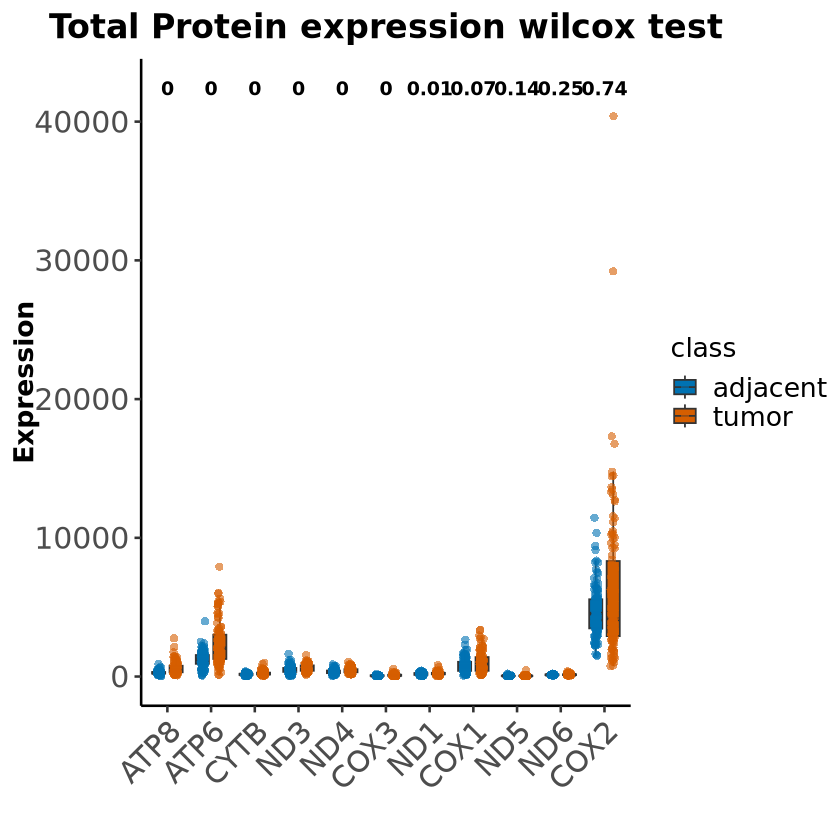

In [120]:
library(ggplot2)
library(ggpubr)
library(dplyr)

# 自定义配色
custom_colors <- c("adjacent" = "#0072B2", "tumor" = "#D55E00")
final_phospho_long$class <- as.factor(final_phospho_long$class)

# 确保 Expression 列为数值型
final_phospho_long$Expression <- as.numeric(as.character(final_phospho_long$Expression))

# 1. 计算每个 Gene 的 p 值
p_value <- final_phospho_long %>%
  filter(class %in% c("adjacent", "tumor")) %>%
  group_by(Gene) %>%
  summarise(
    p_value = tryCatch(
      wilcox.test(Expression ~ class, exact = FALSE)$p.value,
      error = function(e) NA
    ),
    .groups = 'drop'
  ) %>%
  arrange(p_value)

# 2. 设置 Gene 的因子顺序
final_phospho_long$Gene <- factor(final_phospho_long$Gene, levels = p_value$Gene)

# 3. 将 P 值转为字符，准备在图中显示
p_value_labels <- paste0("", round(p_value$p_value, 2))

# 4. 绘图
p <- ggplot(final_phospho_long, aes(x = Gene, y = Expression, fill = class)) +
  geom_boxplot(outlier.shape = NA, width = 0.6, position = position_dodge(0.8)) +
  geom_jitter(aes(color = class), size = 2, alpha = 0.6, shape = 16,
              position = position_jitterdodge(jitter.width = 0.2)) +
  scale_fill_manual(values = custom_colors) +
  scale_color_manual(values = custom_colors) +
  theme_classic(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 18),
    axis.text.y = element_text(size = 18),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, face = "bold", size = 20)
  ) +
  labs(title = "Total Protein expression wilcox test",
       x = "",
       y = "Expression")

# 添加 P 值到相应位置
for (i in 1:nrow(p_value)) {
  p <- p + annotate("text", 
                    x = i, 
                    y = max(final_phospho_long$Expression, na.rm = TRUE) * 1.05, 
                    label = p_value_labels[i], 
                    size = 4, fontface = "bold", hjust = 0.5)
}

# 显示图形
print(p)

In [30]:
p_value

Gene,p_value
<chr>,<dbl>
COX2,0.0004267036
COX3,0.0403644308
CYTB,0.3338509498


In [121]:
ggsave("/ai/data/wuqiao/clinical_sample/WES/RAW_VCF/MT_analysis_2025.5.14_adjust_annotation/paired code and results_adjusted/plots/Protein_wilcox_sortP_626.pdf", plot = p, width = 12, height = 8,dpi=300)

Warning message:
“Removed 210 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 210 rows containing missing values or values outside the scale range
(`geom_point()`).”
